# Рабочая Тетрадь №4 Меджидов М.С БФБО-01-22


# Задача 1
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.


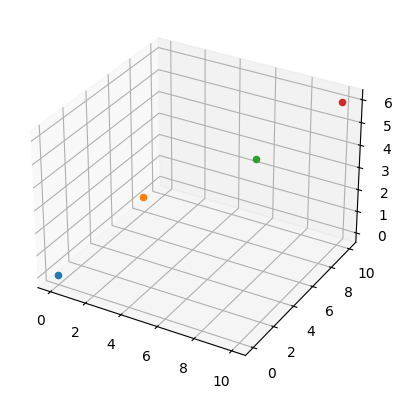

Растояние евклида от точки 0 до точки 1: 5.196152422706632
Квадрат растояния евклида от точки 0 до точки 1: 27.0
Дистанция Чебышева от точки 0 до точки 1: 3.0
Дистанция Хемингтона от точки 0 до точки 1: 9.0

Растояние евклида от точки 1 до точки 2: 5.744562646538029
Квадрат растояния евклида от точки 1 до точки 2: 33.0
Дистанция Чебышева от точки 1 до точки 2: 4.0
Дистанция Хемингтона от точки 1 до точки 2: 9.0

Растояние евклида от точки 2 до точки 3: 4.69041575982343
Квадрат растояния евклида от точки 2 до точки 3: 22.0
Дистанция Чебышева от точки 2 до точки 3: 3.0
Дистанция Хемингтона от точки 2 до точки 3: 8.0



In [2]:
import matplotlib.pyplot as plt
import numpy as np

euclid = lambda x, y: np.linalg.norm(x - y)
euclid_square = lambda x, y: euclid(x, y) ** 2
distanse_chebishev = lambda x, y: np.linalg.norm(x - y, ord=np.inf)
distanse_hemming = lambda x, y: np.linalg.norm(x - y, ord=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(0, 0, 0)
ax.scatter(3, 3, 3)
ax.scatter(7, 7, 4)
ax.scatter(10, 10, 6)
plt.show()

x1 = np.array([0, 0, 0])
x2 = np.array([3, 3, 3])
x3 = np.array([7, 7, 4])
x4 = np.array([10, 10, 6])
x_mass = [x1, x2, x3, x4]
ind = 0
for x in x_mass:
    try:
        print(f'Растояние евклида от точки {ind} до точки {ind+1}: {euclid(x, x_mass[ind + 1])}')
        print(f'Квадрат растояния евклида от точки {ind} до точки {ind+1}: {euclid_square(x, x_mass[ind + 1])}')
        print(f'Дистанция Чебышева от точки {ind} до точки {ind+1}: {distanse_chebishev(x, x_mass[ind + 1])}')
        print(f'Дистанция Хемингтона от точки {ind} до точки {ind+1}: {distanse_hemming(x, x_mass[ind + 1])}\n')
        ind+=1
    except IndexError:
        break


